In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/car.zip

Archive:  drive/My Drive/car.zip
   creating: test/convertible/
  inflating: test/convertible/Convertible Mercedes-AMG GT_100.jpeg  
  inflating: test/convertible/Convertible Mercedes-AMG GT_29.jpeg  
  inflating: test/convertible/Convertible Mercedes-AMG GT_30.jpeg  
  inflating: test/convertible/Convertible Mercedes-AMG GT_31.jpeg  
  inflating: test/convertible/Convertible Mercedes-AMG GT_32.png  
  inflating: test/convertible/Convertible Mercedes-AMG GT_33.jpeg  
  inflating: test/convertible/Convertible Mercedes-AMG GT_41.jpeg  
  inflating: test/convertible/Convertible Mercedes-AMG GT_42.jpeg  
  inflating: test/convertible/Convertible Mercedes-AMG GT_43.jpeg  
  inflating: test/convertible/Convertible Mercedes-AMG GT_44.jpeg  
  inflating: test/convertible/Convertible Mercedes-AMG GT_45.jpeg  
  inflating: test/convertible/Convertible Mercedes-AMG GT_53.jpeg  
  inflating: test/convertible/Convertible Mercedes-AMG GT_54.jpeg  
  inflating: test/convertible/Convertible Mercedes-A

### Model- Description

1. Use VGG-16 pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add 2 FC layers and a output layer to classify 2 classes. 
3. Final architecture will be INPUT --> VGG-16 without Top layers(FC) ---> 2 FC layers --> Output Layer
4. Train only FC layers, output layer. Don't train the VGG-16 network. 


In [ ]:
#import tensorflow
import tensorflow as tf 

#code to check whether gpu is thier or not
if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2

In [ ]:
# import the libraries as shown below
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
dir_path ="/content/train"

In [ ]:
len(os.listdir(dir_path))

8

In [ ]:
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))

No of Images in  convertible  category is  96
No of Images in  suv  category is  91
No of Images in  coupe  category is  84
No of Images in  sports  category is  84
No of Images in  minivan  category is  81
No of Images in  sedan  category is  96
No of Images in  musclecars  category is  84
No of Images in  stationwagon  category is  82


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/train'
valid_path = '/content/validation'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


#[3] is for rgb scale image and [1] is for grayscale image

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
#freezing the weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/train/*')

In [ ]:
# our layers - you can add more if you want
Dense1 = Dense(500,name="Dense1",activation='relu')(vgg16.output)
Dense2 = Dense(500,name="Dense2",activation='relu')(Dense1)
Dense3 = Dense(500,name="Dense3",activation='relu')(Dense2)
Dense4 = Dense(500,name="Dense4",activation='relu')(Dense3)
Dense5 = Dense(500,name="Dense5",activation='relu')(Dense4)
Dense6 = Dense(500,name="Dense6",activation='relu')(Dense5)
x=Flatten()(Dense6)
prediction = Dense(8,name="Output", activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 698 images belonging to 8 classes.


In [ ]:
valid_set = test_datagen.flow_from_directory('/content/validation',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 305 images belonging to 8 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/25
 3/22 [===>..........................] - ETA: 17s - loss: 0.0666 - accuracy: 0.9792

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


22/22 [==============================] - ETA: 0s - loss: 0.0859 - accuracy: 0.9699

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


22/22 [==============================] - 33s 1s/step - loss: 0.0859 - accuracy: 0.9699 - val_loss: 2.9196 - val_accuracy: 0.5738
Epoch 2/25
22/22 [==============================] - 32s 1s/step - loss: 0.0835 - accuracy: 0.9685 - val_loss: 2.6865 - val_accuracy: 0.5803
Epoch 3/25
22/22 [==============================] - 32s 1s/step - loss: 0.0624 - accuracy: 0.9799 - val_loss: 2.5012 - val_accuracy: 0.6164
Epoch 4/25
22/22 [==============================] - 32s 1s/step - loss: 0.0517 - accuracy: 0.9842 - val_loss: 2.7127 - val_accuracy: 0.6197
Epoch 5/25
22/22 [==============================] - 32s 1s/step - loss: 0.0598 - accuracy: 0.9828 - val_loss: 1.9814 - val_accuracy: 0.6262
Epoch 6/25
22/22 [==============================] - 32s 1s/step - loss: 0.0238 - accuracy: 0.9914 - val_loss: 2.5606 - val_accuracy: 0.6426
Epoch 7/25
22/22 [==============================] - 33s 2s/step - loss: 0.0333 - accuracy: 0.9928 - val_loss: 3.0333 - val_accuracy: 0.5443
Epoch 8/25
22/22 [=============

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

NameError: ignored

# Testing Pipeline

In [ ]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('/content/test/suv/toyota Suv cars images_35.jpeg', target_size=(224, 224))

In [ ]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [ ]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [ ]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [ ]:
# predict the probability across all output classes
yhat = model.predict(image)

In [ ]:
yhat

array([[0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
result = np.where(yhat == np.amax(yhat))
r= result[1][0]
r

7

In [ ]:
labels = sorted(os.listdir('/content/train'))


In [ ]:
labels[r]

'suv'

In [ ]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

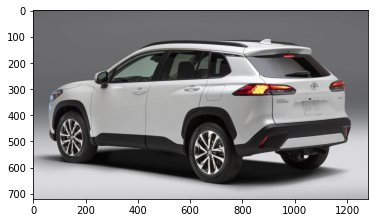

In [ ]:
img = Image.open('/content/test/suv/toyota Suv cars images_35.jpeg')
np_img = np.array(img)
imgplot = plt.imshow(np_img)
plt.show() 

# Testing